
### Simple Linear Regression

Problem Statement

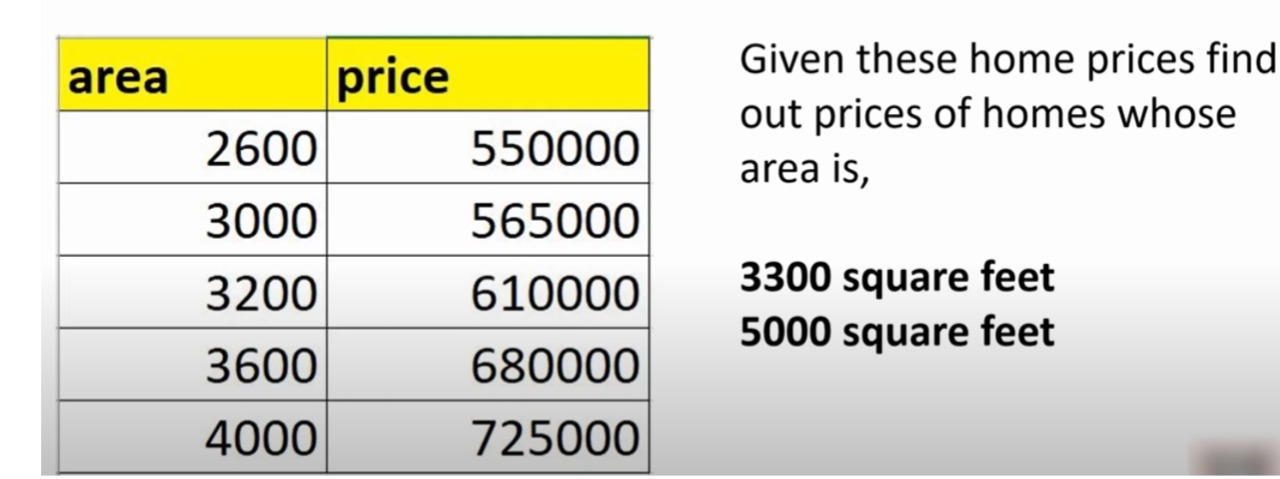

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [71]:
df = pd.read_csv("homeprices1.csv")

In [72]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [73]:
df.tail()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [74]:
df.shape

(5, 2)

In [75]:
df.columns

Index(['area', 'price'], dtype='object')

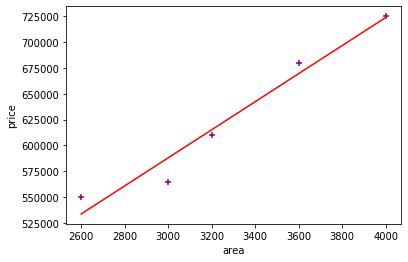

In [88]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'Purple', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'red')

In [77]:
new_df = df.drop('price', axis = 'columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [78]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [79]:
#Create Linear Regression Object
reg = linear_model.LinearRegression()
reg.fit(new_df, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
reg.predict([[3300]])

array([628715.75342466])

In [81]:
reg.coef_

array([135.78767123])

In [82]:
reg.intercept_

180616.43835616432

y = B0 + B1X

In [83]:
180616.43835616432 + 3300 * 135.78767123

628715.7534151643

In [84]:
reg.predict([[5000]])

array([859554.79452055])

In [87]:
180616.43835616432 + 5000 * 135.78767123

859554.7945061643

### MULTIPLE LINEAR REGRESSION
Linear Regression with Multiple Variables

Problem Statement

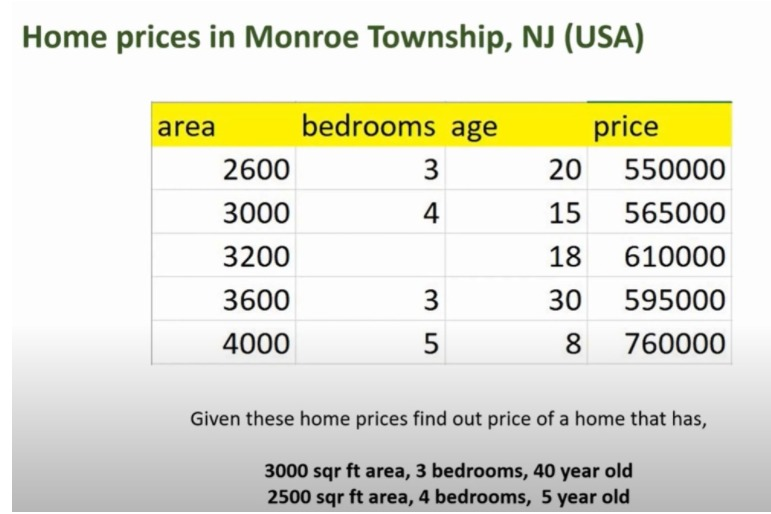

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [2]:
hp = pd.read_csv("homeprices2.csv")

In [3]:
hp.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
hp.tail()

,area,bedrooms,age,price
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
hp.shape

(6, 4)

In [6]:
hp.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [7]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
area        6 non-null int64
bedrooms    5 non-null float64
age         6 non-null int64
price       6 non-null int64
dtypes: float64(1), int64(3)
memory usage: 272.0 bytes


In [8]:
hp.bedrooms.median()

4.0

In [9]:
hp.bedrooms = hp.bedrooms.fillna(hp.bedrooms.median())
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


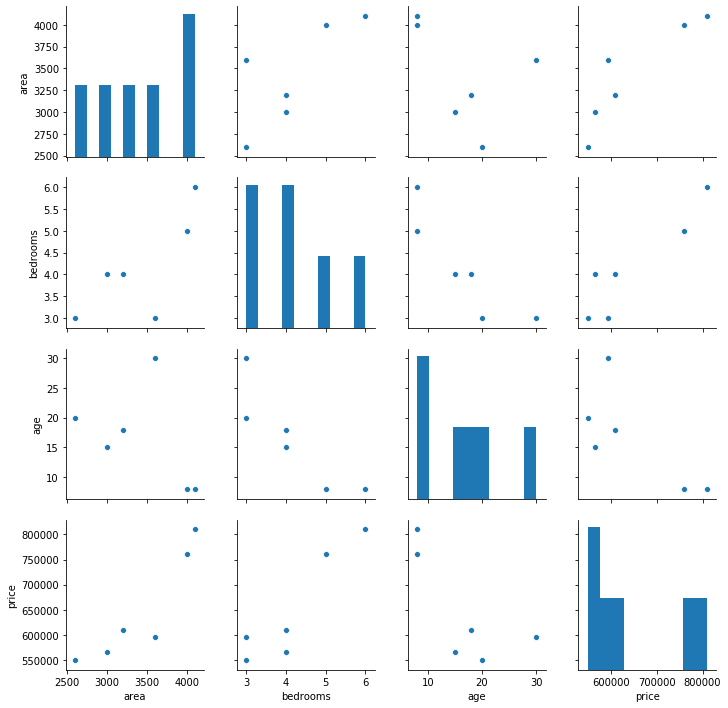

In [10]:
sns.pairplot(hp)

In [11]:
hp.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


Text(0.5, 1, 'Correlation between features')

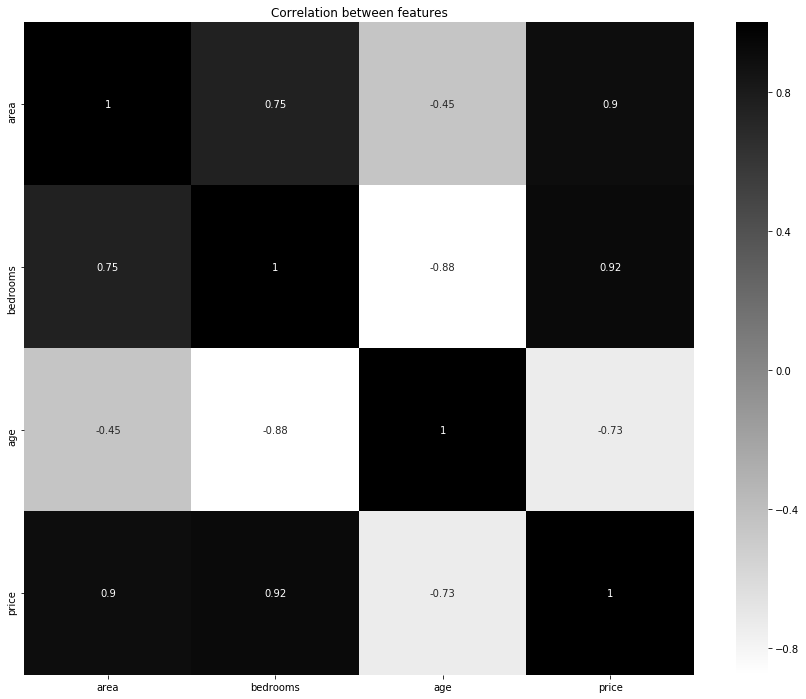

In [12]:
LE = preprocessing.LabelEncoder()
cat_col = hp.select_dtypes(include = "object").columns.tolist()
for i in cat_col:
    hp.loc[:,i] = LE.fit_transform(hp.loc[:,i])
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(hp.corr(), annot = True, cmap = "binary").set_title("Correlation between features")

In [13]:
reg = linear_model.LinearRegression()
reg.fit(hp.drop('price',axis='columns'),hp.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [15]:
reg.intercept_

221323.00186540408

In [16]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

Find price of home with 3000sq ft area, 3 bedrooms, 40 years old

In [17]:
112.06244194 * 3000 + 23388.88007794 * 3 + -3231.71790863 * 40 + 221323.00186540408

498408.2515740241

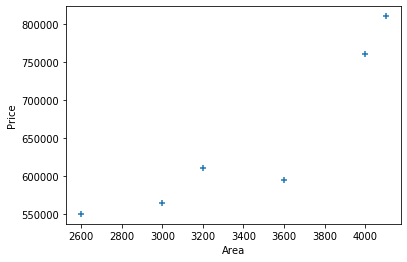

In [18]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(hp['area'], hp['price'], marker = '+')
#plt.plot(hp.area, reg.predict(hp[['area']]))

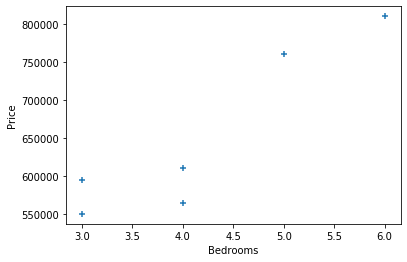

In [19]:
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.scatter(hp['bedrooms'], hp['price'], marker = '+')
#plt.plot(hp.bedrooms, reg.predict(hp[['bedrooms']]))

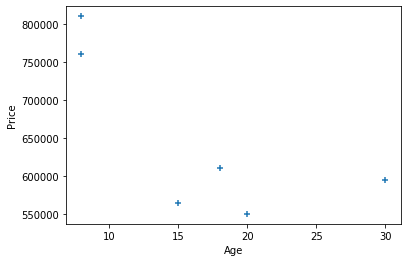

In [20]:
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(hp['age'], hp['price'], marker = '+')
#plt.plot(hp.age, reg.predict(hp['age']))

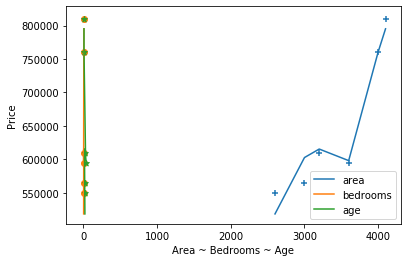

In [21]:
plt.xlabel('Area ~ Bedrooms ~ Age')
plt.ylabel('Price')
x = hp[['area','bedrooms','age']]
plt.scatter(hp[['area']], hp['price'], marker = '+')
plt.scatter(hp[['bedrooms']], hp['price'], marker = 'o')
plt.scatter(hp[['age']], hp['price'], marker = '*')
plt.plot(x, reg.predict(hp[['area','bedrooms','age']]))
plt.legend(x)

In [22]:
hp1 = hp.copy()

In [23]:
Transformed_Area = hp1['area']/100
hp1.insert(4, "TransformedArea", Transformed_Area)

In [24]:
hp1

,area,bedrooms,age,price,TransformedArea
0,2600,3.0,20,550000,26.0
1,3000,4.0,15,565000,30.0
2,3200,4.0,18,610000,32.0
3,3600,3.0,30,595000,36.0
4,4000,5.0,8,760000,40.0
5,4100,6.0,8,810000,41.0


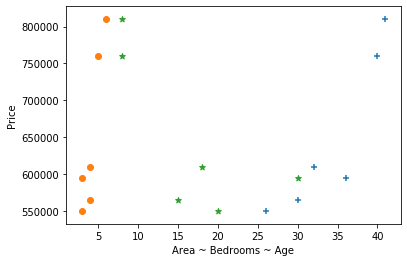

In [25]:
plt.xlabel('Area ~ Bedrooms ~ Age')
plt.ylabel('Price')
x = hp1[['TransformedArea','bedrooms','age']]
plt.scatter(hp1[['TransformedArea']], hp1['price'], marker = '+')
plt.scatter(hp1[['bedrooms']], hp1['price'], marker = 'o')
plt.scatter(hp1[['age']], hp1['price'], marker = '*')

----------------------------------------------------------------------------------------------------------------------